In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the two csv files
df_obs = pd.read_csv('observations.csv')
df_spec = pd.read_csv('species_info.csv')
print(df_spec.shape)

#Need to drop duplicates from df_obs
df_obs = df_obs.drop_duplicates()

#joining the two csv files using left join to put the park names and the common names, category, observation status together
df = pd.merge(df_obs, df_spec, how='left', on='scientific_name')

#Getting all the animals
df_animals = df[df['category'] != 'Vascular Plant']
df_animals = df_animals[df_animals['category'] != 'Nonvascular Plant']

#Filling empty conservation_status with 'Not conserved'

df_animals = df_animals.fillna('Not Conserved')

#Find the most found category in each of the 4 national parks
#Find most conserved category


(5824, 4)


In [5]:
#Finding the conservation spread
df_conservation = df_animals.groupby(['conservation_status', 'park_name','category'])['scientific_name'].count().reset_index()


#Find for one park_name
#This will later become a function
df_conservation_park = df_conservation[df_conservation['park_name'] == 'Yellowstone National Park']

df_conservation_park[df_conservation_park['category'] == 'Bird']

,conservation_status,park_name,category,scientific_name
9,Endangered,Yellowstone National Park,Bird,4
20,In Recovery,Yellowstone National Park,Bird,3
35,Not Conserved,Yellowstone National Park,Bird,501
55,Species of Concern,Yellowstone National Park,Bird,80


['American Peregrine Falcon', 'Bald Eagle', 'Brown Pelican']


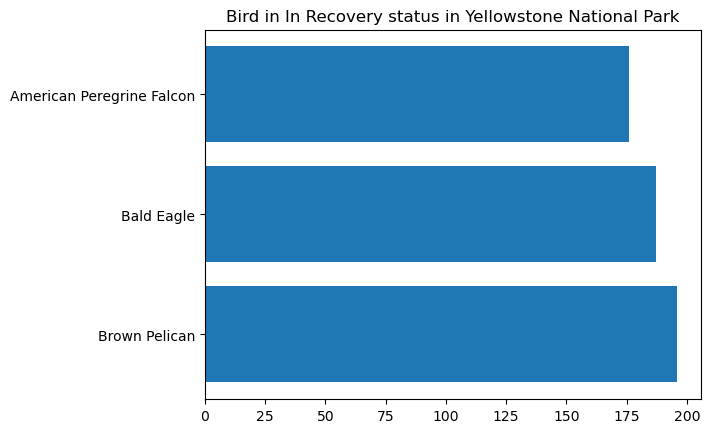

In [6]:
#Funciton to create a horizontal bar graph to find hte number of animals by category and conservation status in designated parks

def graph_cat(category, conservation_status, park):
    df_cat_con = df.loc[(df['category'] == category) & (df['conservation_status'] == conservation_status) & (df['park_name'] == park)]
    df_sci = df_cat_con.groupby(['scientific_name'])['observations'].sum().reset_index()
    
    
    #Join to find the common name
    df_com = pd.merge(df_sci,df_spec, how='left', on='scientific_name')
    df_com = df_com[df_com['conservation_status'] == conservation_status]
    df_com = df_com.drop_duplicates(subset = 'scientific_name')

    
    name_list = list(df_com.common_names)
    print(name_list)

    #Making the plot
    ax = plt.subplot()
    plt.barh(df_com.common_names, df_com.observations, align='center')
    ax.invert_yaxis()
    ax.set_title(f'{category} in {conservation_status} status in {park}')
    plt.show()

#Make sure the parameters are in String
#Function to make a graph of animals based on the park name, conservation status
graph_cat('Bird', 'In Recovery', 'Yellowstone National Park')


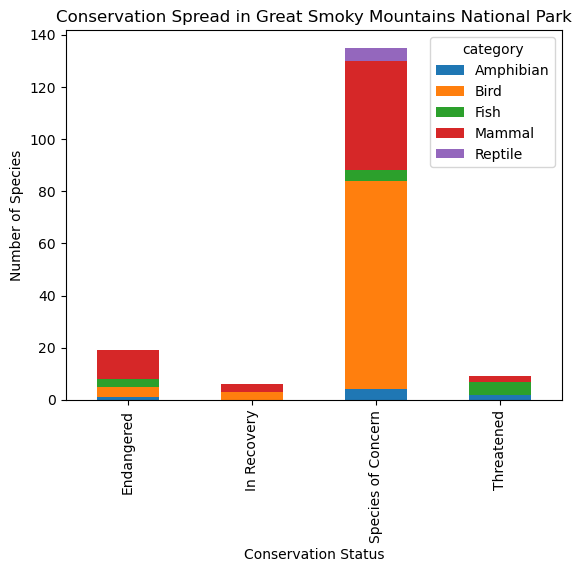

In [7]:
def conservation_spread(park):
    df_park_an = df_animals.loc[(df_animals['park_name'] == 'Bryce National Park') & (df_animals['conservation_status'] != 'Not Conserved')]
    conservationCat = df_park_an.groupby(['conservation_status','category'])['common_names'].count().unstack()
    conservationCat

    ax = conservationCat.plot(kind='bar', stacked=True)
    ax.set_xlabel('Conservation Status')
    ax.set_ylabel('Number of Species')
    ax.set_title(f'Conservation Spread in {park}')

#Write the Park name in String form to find the conservation spread by categories
park_names = df_obs['park_name'].unique()

#Following loop to generate charts for all parks
#for name in park_names:
    #conservation_spread(name)
    
conservation_spread(park_names[0])

In [9]:
species = pd.read_csv('species_info.csv')
species = species.drop_duplicates()
species.fillna('No Intervention', inplace=True)

conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count().unstack()
conservationCategory

species['is_protected'] = species.conservation_status == 'No Intervention'

In [10]:
category_counts = species.groupby(['category','is_protected'])\
                                        .scientific_name.nunique()\
                                        .reset_index()\
                                        .pivot(columns='is_protected',
                                              index='category',
                                              values='scientific_name').reset_index()
category_counts.columns = ['category','protected', 'not_protected']
category_counts

category_counts['percent_protected'] = (category_counts['protected']/ (category_counts['not_protected'] + category_counts['protected'])) * 100
category_counts

,category,protected,not_protected,percent_protected
0,Amphibian,7,72,8.860759
1,Bird,75,413,15.368852
2,Fish,11,115,8.730159
3,Mammal,30,146,17.045455
4,Nonvascular Plant,5,328,1.501502
5,Reptile,5,73,6.410256
6,Vascular Plant,46,4216,1.079305


In [14]:
from scipy.stats import chi2_contingency

#Checking if the the protectected conservation status is associated with the category of the animal

contingency = [[7,72],[75,413]]
chi2_contingency(contingency)

contingency2=[[30, 146], [75,413]]
chi2_contingency(contingency2)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))